# Plot power spectra #

In [1]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np
import os

from nbodykit import style

In [2]:
# setup style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use(style.notebook)
colors = [d['color'] for d in style.notebook['axes.prop_cycle']]

## Global params ##

In [3]:
# path to script output
power_fname = '../data/out_512/power.txt'

## Read script output ##

In [4]:
P = np.genfromtxt(power_fname, names=True, skip_header=2)

In [5]:
print(P.dtype)
print(P.shape)

[('k', '<f8'), ('Prr', '<f8'), ('Ptt', '<f8'), ('Prt', '<f8'), ('Pii', '<f8'), ('Pit', '<f8')]
(255,)


In [6]:
k = P['k']
Prr = P['Prr']
Ptt = P['Ptt']
Prt = P['Prt']
Pii = P['Pii']
Pit = P['Pit']

## Plot ##

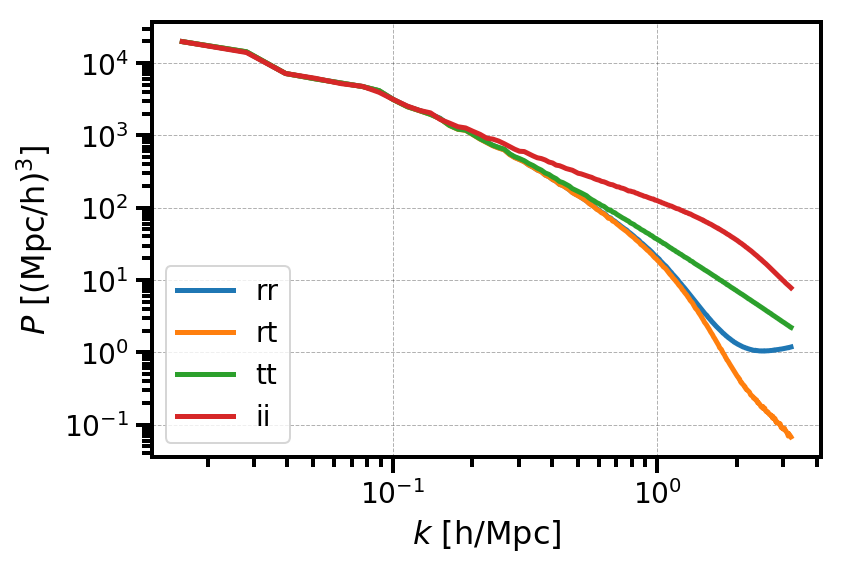

In [7]:
# Plot power spectra
plt.figure(figsize=(6,4))
plt.loglog(k, Prr, label='rr')
plt.loglog(k, Prt, label='rt')
plt.loglog(k, Ptt, label='tt')
plt.loglog(k, Pii, label='ii')

plt.legend(loc='best', fontsize=14);
plt.xlabel(r'$k$ [h/Mpc]');
plt.ylabel(r'$P$ [$($Mpc/h$)^3$]');

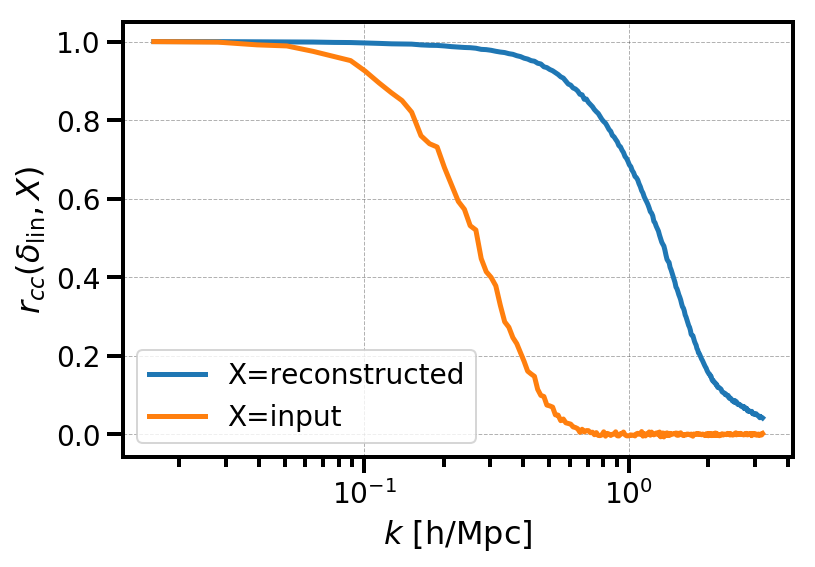

In [8]:
# Plot correlation coefficient
plt.figure(figsize=(6,4))
plt.semilogx(k, Prt/np.sqrt(Ptt*Prr),
            label='X=reconstructed')

plt.semilogx(k, Pit/np.sqrt(Pii*Ptt),
            label='X=input')

plt.legend(loc='best', fontsize=14);
plt.xlabel(r'$k$ [h/Mpc]');
plt.ylabel(r'$r_{cc}(\delta_\mathregular{lin},X)$');

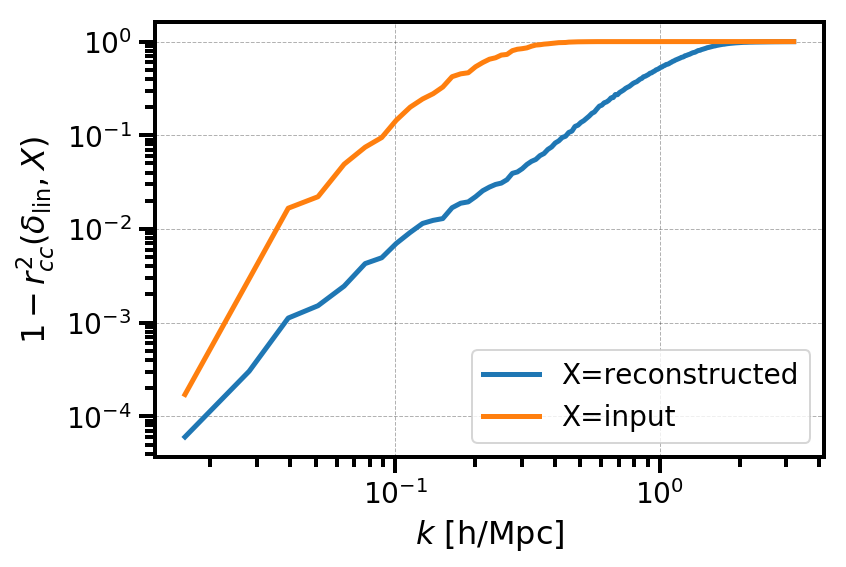

In [9]:
# Plot 1 - correlation coefficient^2
plt.figure(figsize=(6,4))
plt.loglog(k, 1.0 - Prt**2/(Ptt*Prr),
            label='X=reconstructed')
plt.loglog(k, 1.0 - Pit**2/(Ptt*Pii),
            label='X=input')

plt.legend(loc='best', fontsize=14);
plt.xlabel(r'$k$ [h/Mpc]');
plt.ylabel(r'$1-r^2_{cc}(\delta_\mathregular{lin},X)$');